<a href="https://colab.research.google.com/github/Ana-PPS/data-and-analytcs/blob/MVP_II/MVP_a_Sprint_II_Ana_Paula_Salgado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP-a Sprint II:

>Previsão de preferências humanas para sabores de vinhos, a partir de testes analíticos, disponíveis na etapa de certificação dos mesmos.

>>Ana Paula Pinheiro Salgado


## 1. Definição do Problema

Introdução
---
O dataset usado neste MVP será o **Wine Quality Dataset**,  originalmente utilizado no projeto "Modeling wine preferences by data mining from physicochemical properties". Sumário disponível em https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub.

O dataset apresenta diversos atributos relacionados às caracteristicas físico-químicas do "Vinho Verde" Português, nas variedades tinto e branco, obtidos em análises laboratoriais usualmente realizadas para caracterização de vinhos e que refletem na qualidade do vinho, medida por meio de dados sensoriais, com pontuação entre 0 a 10.

Para mais detalhes sobre este dataset, consulte: https://archive.ics.uci.edu/ml/datasets/wine+quality

---
Descrição das Variáveis
---
**Variáveis preditoras, baseadas em análises físico-químicas:**
1. **acidez fixa** (g / dm^3)
2. **acidez volátil** (g / dm^3)
3. **ácido cítrico** (g / dm^3)
4. **açucar residual** (g / dm^3)
5. **cloretos** (g / dm^3)
6. **dióxido de enxofre livre** (mg / dm^3)
7. **dióxido de enxofre total** (mg / dm^3)
8. **densidade** (g / dm^3)
9. **pH**
10. **sulfatos** (g / dm^3)
11. **álcool** (%)
** Variável alvo, baseada em dados sensoriais:**
12. **qualidade** (nota entre 0 a 10)
---
Objetivo
---
O objetivo deste trabalho consiste em analisar os atributos característicos de vinhos brancos e determinar a qualidade dos vinhos produzidos.

Trata-se de um problema de `aprendizado supervisionado`, que será utilizado com a finalidade de `classificação`, fornecendo um direcionamento sobre as preferências do consumidor para área de Marketing, buscando as características determinantes que influenciam na avaliação do consumidor.

Para este MVP busca-se responder se a partir do monitoramento dos parâmentos físico-químicos é possivel estabelecer metas de produção voltadas para atender determinado público de interesse, com base nas suas preferênciais sensoriais.

## 1: Importação das bibliotecas necessárias

In [47]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder # para transformar atributos categóricos em numéricos
from sklearn.preprocessing import StandardScaler # para padronização dos atributos
from sklearn.preprocessing import MinMaxScaler # para normalização dos atributos
from sklearn.model_selection import train_test_split # para aplicação do holdout
from sklearn.model_selection import KFold # para preparar os folds de validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # avaliação da acurácia dos modelos
from sklearn.model_selection import cross_val_predict # retorna as predições em cada teste de fold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix # para construção da matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay # para plotar a matriz de confusão
from sklearn.metrics import accuracy_score # para avaliação da acurácia
from sklearn.metrics import precision_score # para avaliação da precisão
from sklearn.metrics import recall_score # para avaliação do recall
from sklearn.metrics import f1_score # para avaliação do f1 score
from sklearn.pipeline import Pipeline # para construção do Pipeline
from sklearn.tree import DecisionTreeClassifier # classificador árvore de decisão
from sklearn.neighbors import KNeighborsClassifier # classificador KNN
from sklearn.naive_bayes import GaussianNB # classificador Naive Bayes
from sklearn.svm import SVC # classificador Suport Vector Machine

from sklearn.ensemble import BaggingClassifier # ensemble Bagging
from sklearn.ensemble import RandomForestClassifier # ensemble Random Forest
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.ensemble import VotingClassifier # ensemble Voting
from sklearn.ensemble import AdaBoostClassifier # ensemble Boosting
from sklearn.ensemble import GradientBoostingClassifier #??

from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada *??
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

In [48]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2: Carga de Dados

Utilização do pacote Pandas (Python Data Analysis Library) para carregar arquivo .csv, disponível no repositório github, sem cabeçalho, forçando a não utilização da primeira coluna como índice e definido uma coluna adicional `` Tipo de Vinho `` (White / Red) .

In [49]:
# Carrega arquivo csv usando Pandas

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Ana-PPS/data-and-analytcs/main/wine-quality-white-and-red.csv"

# Informa o cabeçalho das colunas
colunas = ['tipo_vinho', 'acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
           'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total', 'densidade', 'pH',
           'sulfatos', 'alcool', 'qualidade']

# Lê o arquivo utilizando as colunas informadas acima, sem utilizar a primeira coluna como índice
df_wine = pd.read_csv(url, names=colunas, skiprows=1, index_col=False, delimiter=',')


In [50]:
df_wine.head()

,tipo_vinho,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [51]:
df_wine.tail()

,tipo_vinho,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Após a carga do dataframe e a exibição das 5 primeiras e 5 últimas linhas do mesmo, percebe-se que o mesmo foi carregado adequadamente, com todos os atributos.

Considerando que cada tipo de vinho possui um processo de produção específico, as propriedades físico-químicas dos vinhos tinto e branco tendem a ser diferenciadas e por este motivo, nesse momento será avaliada a representatividade de cada tipo observado no dataframe em questão e selecionada a amostra de maior representação para continuidade das análises e preparação para o modelo de ML.

In [52]:
# Avaliando a representatividade de cada tipo de vinho que compõe o dataframe
print(df_wine.groupby('tipo_vinho').size())

tipo_vinho
red      1599
white    4898
dtype: int64


Conforme resultado acima, observa-se que 75% do conjunto de dados corresponde ao tipo _White_ (branco), tornando-se, portanto, o objeto de estudo deste MVP.

### 2.1. Seleção do Dataframe para o MVP

In [53]:
# Criando um novo dataframe, selecionando apenas a categoria de vinhos brancos
df_wine_brancos = df_wine[df_wine['tipo_vinho'] == 'white']

# Mostrando as 5 primeiras linhas
df_wine_brancos.head(5)

,tipo_vinho,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [54]:
# Mostrando as 5 últimas linhas
df_wine_brancos.tail(5)

,tipo_vinho,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [55]:
# Removendo a coluna 'tipo_vinho' do dataframe
df_wine_brancos = df_wine_brancos.drop('tipo_vinho',axis=1)

## 3: Análise de Dados

### 3.1. Estatísticas Descritivas

Iniciando com a verificação da estrutura do dataframe, os tipos de dados e as estatísticas descritivas básicas do conjunto de dados.

In [56]:
# Mostra as dimensões do dataframe
print(df_wine_brancos.shape)

(4898, 12)


In [57]:
# Mostra as informações do dataframe
print(df_wine_brancos.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            4898 non-null   float64
 1   acidez_volatil         4898 non-null   float64
 2   acido_citrico          4898 non-null   float64
 3   acucar_residual        4898 non-null   float64
 4   cloretos               4898 non-null   float64
 5   dioxido_enxofre_livre  4898 non-null   float64
 6   dioxido_enxofre_total  4898 non-null   float64
 7   densidade              4898 non-null   float64
 8   pH                     4898 non-null   float64
 9   sulfatos               4898 non-null   float64
 10  alcool                 4898 non-null   float64
 11  qualidade              4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.5 KB
None


Observa-se que o atribuito qualidade é do tipo inteiro. Como esta é a variável alvo, será antecipado aqui uma etapa do Pré-processamento que é a discretização para uma variável categórica ordinal, com o objetivo de melhorar a qualidade da análise exploratória e também limitar a quantidade de saídas possíveis do modelo.

In [58]:
# Efetuando a discretização da coluna qualidade
df_wine_brancos['qualidade_label'] = pd.cut(df_wine_brancos['qualidade'],
                                            bins = 3,
                                            labels = ['baixa', 'média', 'alta'])

# Substituido o dataframe
df_wine_brancos_categ = df_wine_brancos.drop('qualidade', axis=1)

In [59]:
# Exibindo as informações do novo dataframe
print(df_wine_brancos_categ.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   acidez_fixa            4898 non-null   float64 
 1   acidez_volatil         4898 non-null   float64 
 2   acido_citrico          4898 non-null   float64 
 3   acucar_residual        4898 non-null   float64 
 4   cloretos               4898 non-null   float64 
 5   dioxido_enxofre_livre  4898 non-null   float64 
 6   dioxido_enxofre_total  4898 non-null   float64 
 7   densidade              4898 non-null   float64 
 8   pH                     4898 non-null   float64 
 9   sulfatos               4898 non-null   float64 
 10  alcool                 4898 non-null   float64 
 11  qualidade_label        4898 non-null   category
dtypes: category(1), float64(11)
memory usage: 464.1 KB
None


In [60]:
# Exibindo a quantidade de linhas por coluna
df_wine_brancos_categ.count(0)

acidez_fixa              4898
acidez_volatil           4898
acido_citrico            4898
acucar_residual          4898
cloretos                 4898
dioxido_enxofre_livre    4898
dioxido_enxofre_total    4898
densidade                4898
pH                       4898
sulfatos                 4898
alcool                   4898
qualidade_label          4898
dtype: int64

O dataframe contém 4898 instâncias, com 11 atributos quantitativos contínuos e 1 qualitativo ordinal.

In [61]:
# Verificando se há valores ausentes
df_wine_brancos_categ.isnull().sum()

acidez_fixa              0
acidez_volatil           0
acido_citrico            0
acucar_residual          0
cloretos                 0
dioxido_enxofre_livre    0
dioxido_enxofre_total    0
densidade                0
pH                       0
sulfatos                 0
alcool                   0
qualidade_label          0
dtype: int64

Observado pelos comandos acima que não existem valores faltantes nos atributos do dataframe em análise, não demandando nenhum tratamento adicional para Missings.

In [62]:
# Exibe um sumário estatístico do dataframe (média, desvio padrão, mínimo, máximo e os quartis)
df_wine_brancos_categ.describe()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


Os atributos de Dióxido de Enxofre (Total e Livre) e Açúcar Residual apresentam o maior desvio padrão, visto a elevada amplitude dos seus respectivos valores. Deve ser observado a existência de outliers, algum valor potencialmente inválido ou ainda, algum erro na entrada dos dados. Persistindo a elevada amplitude, deve-se avaliar a necessidade de transformação logarítima para redução do range.

Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário.

In [63]:
# distribuição das classes
print(df_wine_brancos_categ.groupby('qualidade_label').size())

qualidade_label
baixa    1640
média    3078
alta      180
dtype: int64


Observa-se uma concentração de vinhos de qualidade inferior e média (96%). Tal desbalanceamento poderá enviezar os resultados no modelo de ML. Para um tratamento adequado, será necessário adotar técnica de validação cruzada estratificada na etapa de pré-processamento dos dados.



### 3.2. Visualizações Unimodais


#### 3.2.1. Histograma

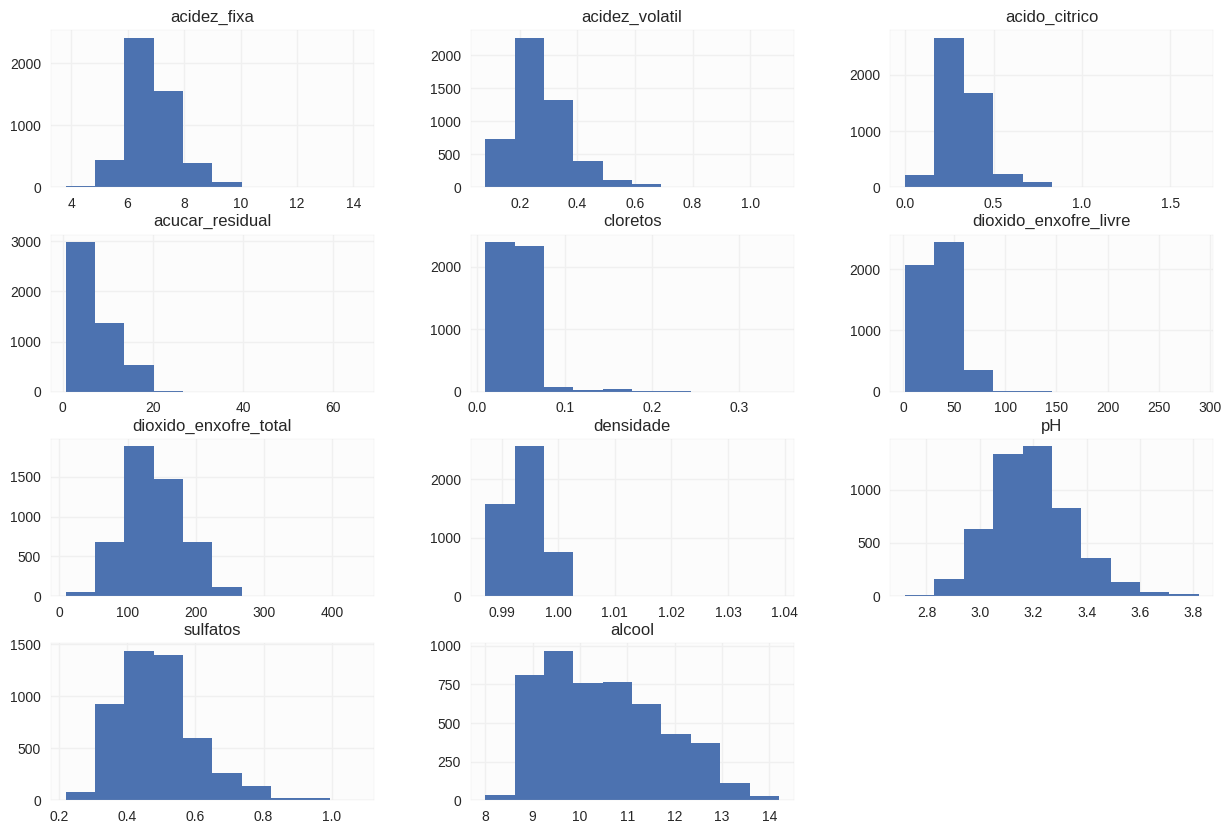

In [64]:
# Criação de Histograma para cada atributo do dataframe

# Carrega uma folha de estilos (questões estéticas)
plt.style.use("seaborn-v0_8")

# Modifica mais alguns parâmetros gráficos (questões estéticas)
plt.rc("axes", facecolor="#fcfcfc", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

# Montando o histograma
df_wine_brancos_categ.hist(figsize = (15,10))
plt.show()

A análise visual dos histogramas mostra que o atributo densidade apresenta uma distribuição simétrica e que o atributo pH se aproxima de uma distribuição normal. Os demais atributos apresentam assimetria positiva, indicando possíveis valores extremos no conjunto de dados.

#### 3.2.2. Boxplot
No **boxblot**, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

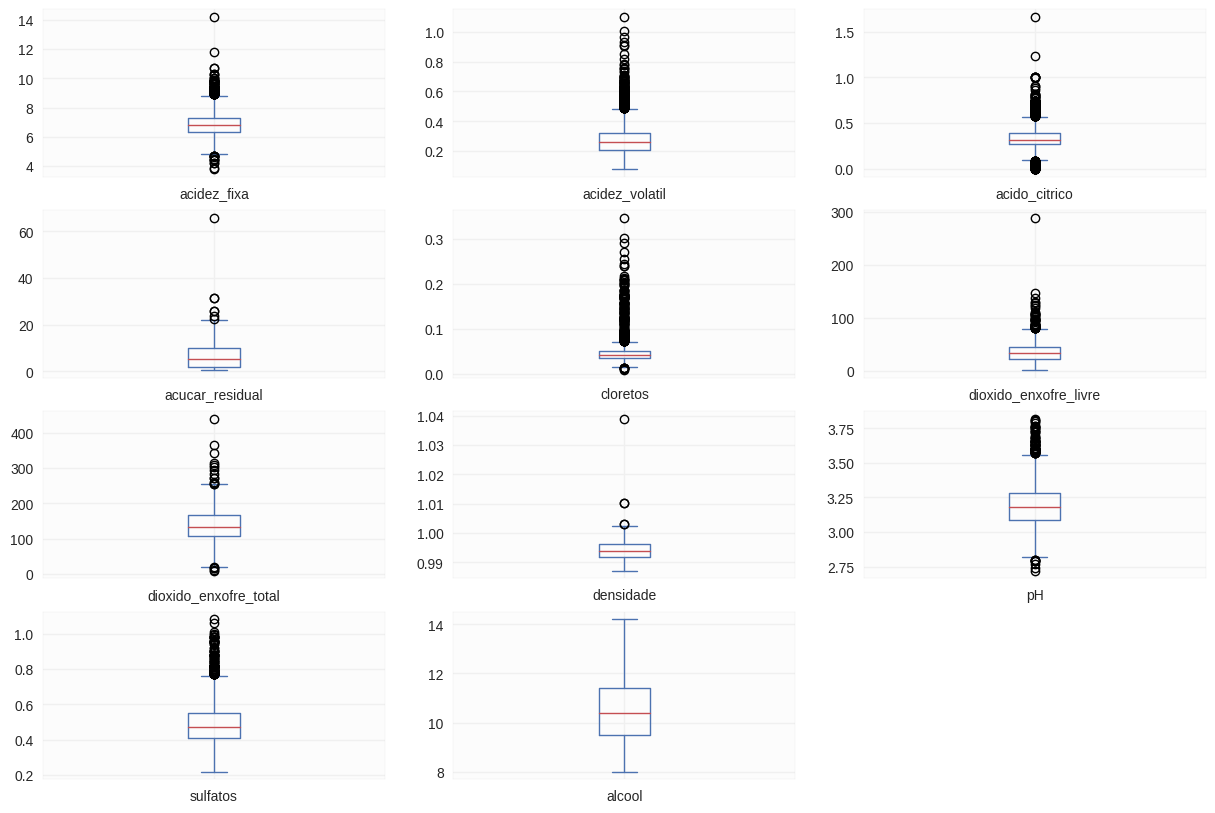

In [65]:
# Boxplot
df_wine_brancos_categ.plot(kind = 'box', subplots = True, layout = (4,3),
                           sharex = False, sharey = False, figsize = (15,10))
plt.show()

Validando as observações visuais dos histogramas, excetuando os atributos _densidade_, _acucar_residual_  e _alcool_ (o único que não possui outliers), nota-se nos bloxplots dos demais atributos uma elevada quantidade de outliers em cada uma das séries. Esse ponto requer uma análise junto ao especialista da área, visando aplicar o tratamento correto para os valores extremos.

### 3.3. Visualizações Multimodais

#### 3.3.1. Matriz de Correlação

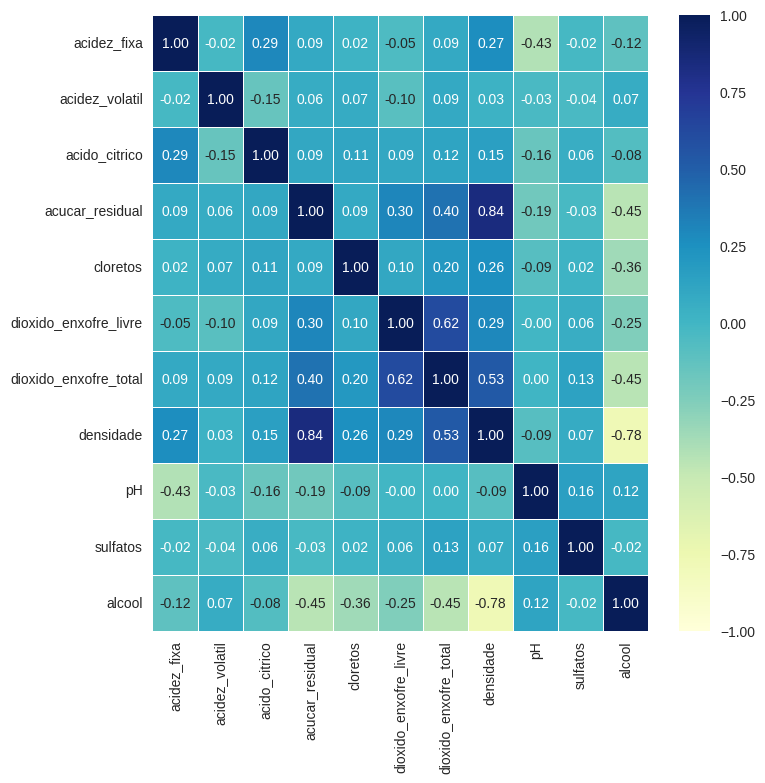

In [66]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize=(8,8))
sns.heatmap(df_wine_brancos_categ.corr(), annot=True,
            fmt = ".2f", cmap='YlGnBu',
            linewidths=.5,
            vmin = -1, vmax = 1);

Analisando o coeficiente de correlação apresentado na visualização acima extrai-se as seguintes observações:

> _acidez_fixa_: possui maior correlação positiva com as variáveis _acido_citrico_ e _densidade_, correlaciona-se negativamente, em maior intensidade com o _pH_. Dentre todos os atributos, sua maior correlação positiva é com o _acido_citrico_ .
---
> _acidez_volatil_: possui baixa correlação, em geral, com todos os demais atributos. Tem uma maior correlação negativa com _acido_citrico_.
---
> _acido_citrico_: apresenta um certo equilibrio de covariância com as demais variáveis, sendo a  maior correlação positiva com _acidez_fixa_, conforme mencionado anteriormente.
---
> _acucar_residual_: forte correlação positiva com _densidade_ e inversamente com _alcool_.
---
> _cloretos_: praticamente ausência de correlação com _acidez_fixa_ e _sulfatos_. Correlacões mais expressivas com _densidade_ e _alcool_, positiva e negativa, respectivamente.
---
> _dioxido_enxofre_livre_ e _dioxido_enxofre_total_: considerando que o Dióxido de Enxofre Total contém a parcela Livre na sua amostra, percebe-se a similaridade no comportamento de correlação com os demais atributos, nesse caso sendo até mais representativo analisar apenas o comportamento da variável _dioxido_enxofre_total_, que possui maior correlação positiva com _densidade_ e _acucar_residual_ (desprezando-se nesse caso a correlação com a parcela Livre). Por outro lado, possui correlação negativa com _alcool_.
---
> _densidade_: possui alta correlação positiva com _acucar_residual_ e inversamente com _alcool_.
---
> _pH_: atributo que possui maior correlação positiva com _sulfatos_ e correlação negativa com _acidez_fixa_.
---
> _sulfatos_: tem a correlação mais expressiva com _pH_, como já mencionado acima.
---
> _alcool_: verifica-se que correlaciona-se, majoritariamente, de forma inversa com os demais atributos, com destaque para _densidade_ e _acucar_residual_.

#### 3.3.2. Scatter Plot

O gráfico de dispersão (**scatter plot**) mostra o relacionamento para cada par de atributos dos dataset, segmentado pela classificação categórica de qualidade atribuida a cada dado da amostra.

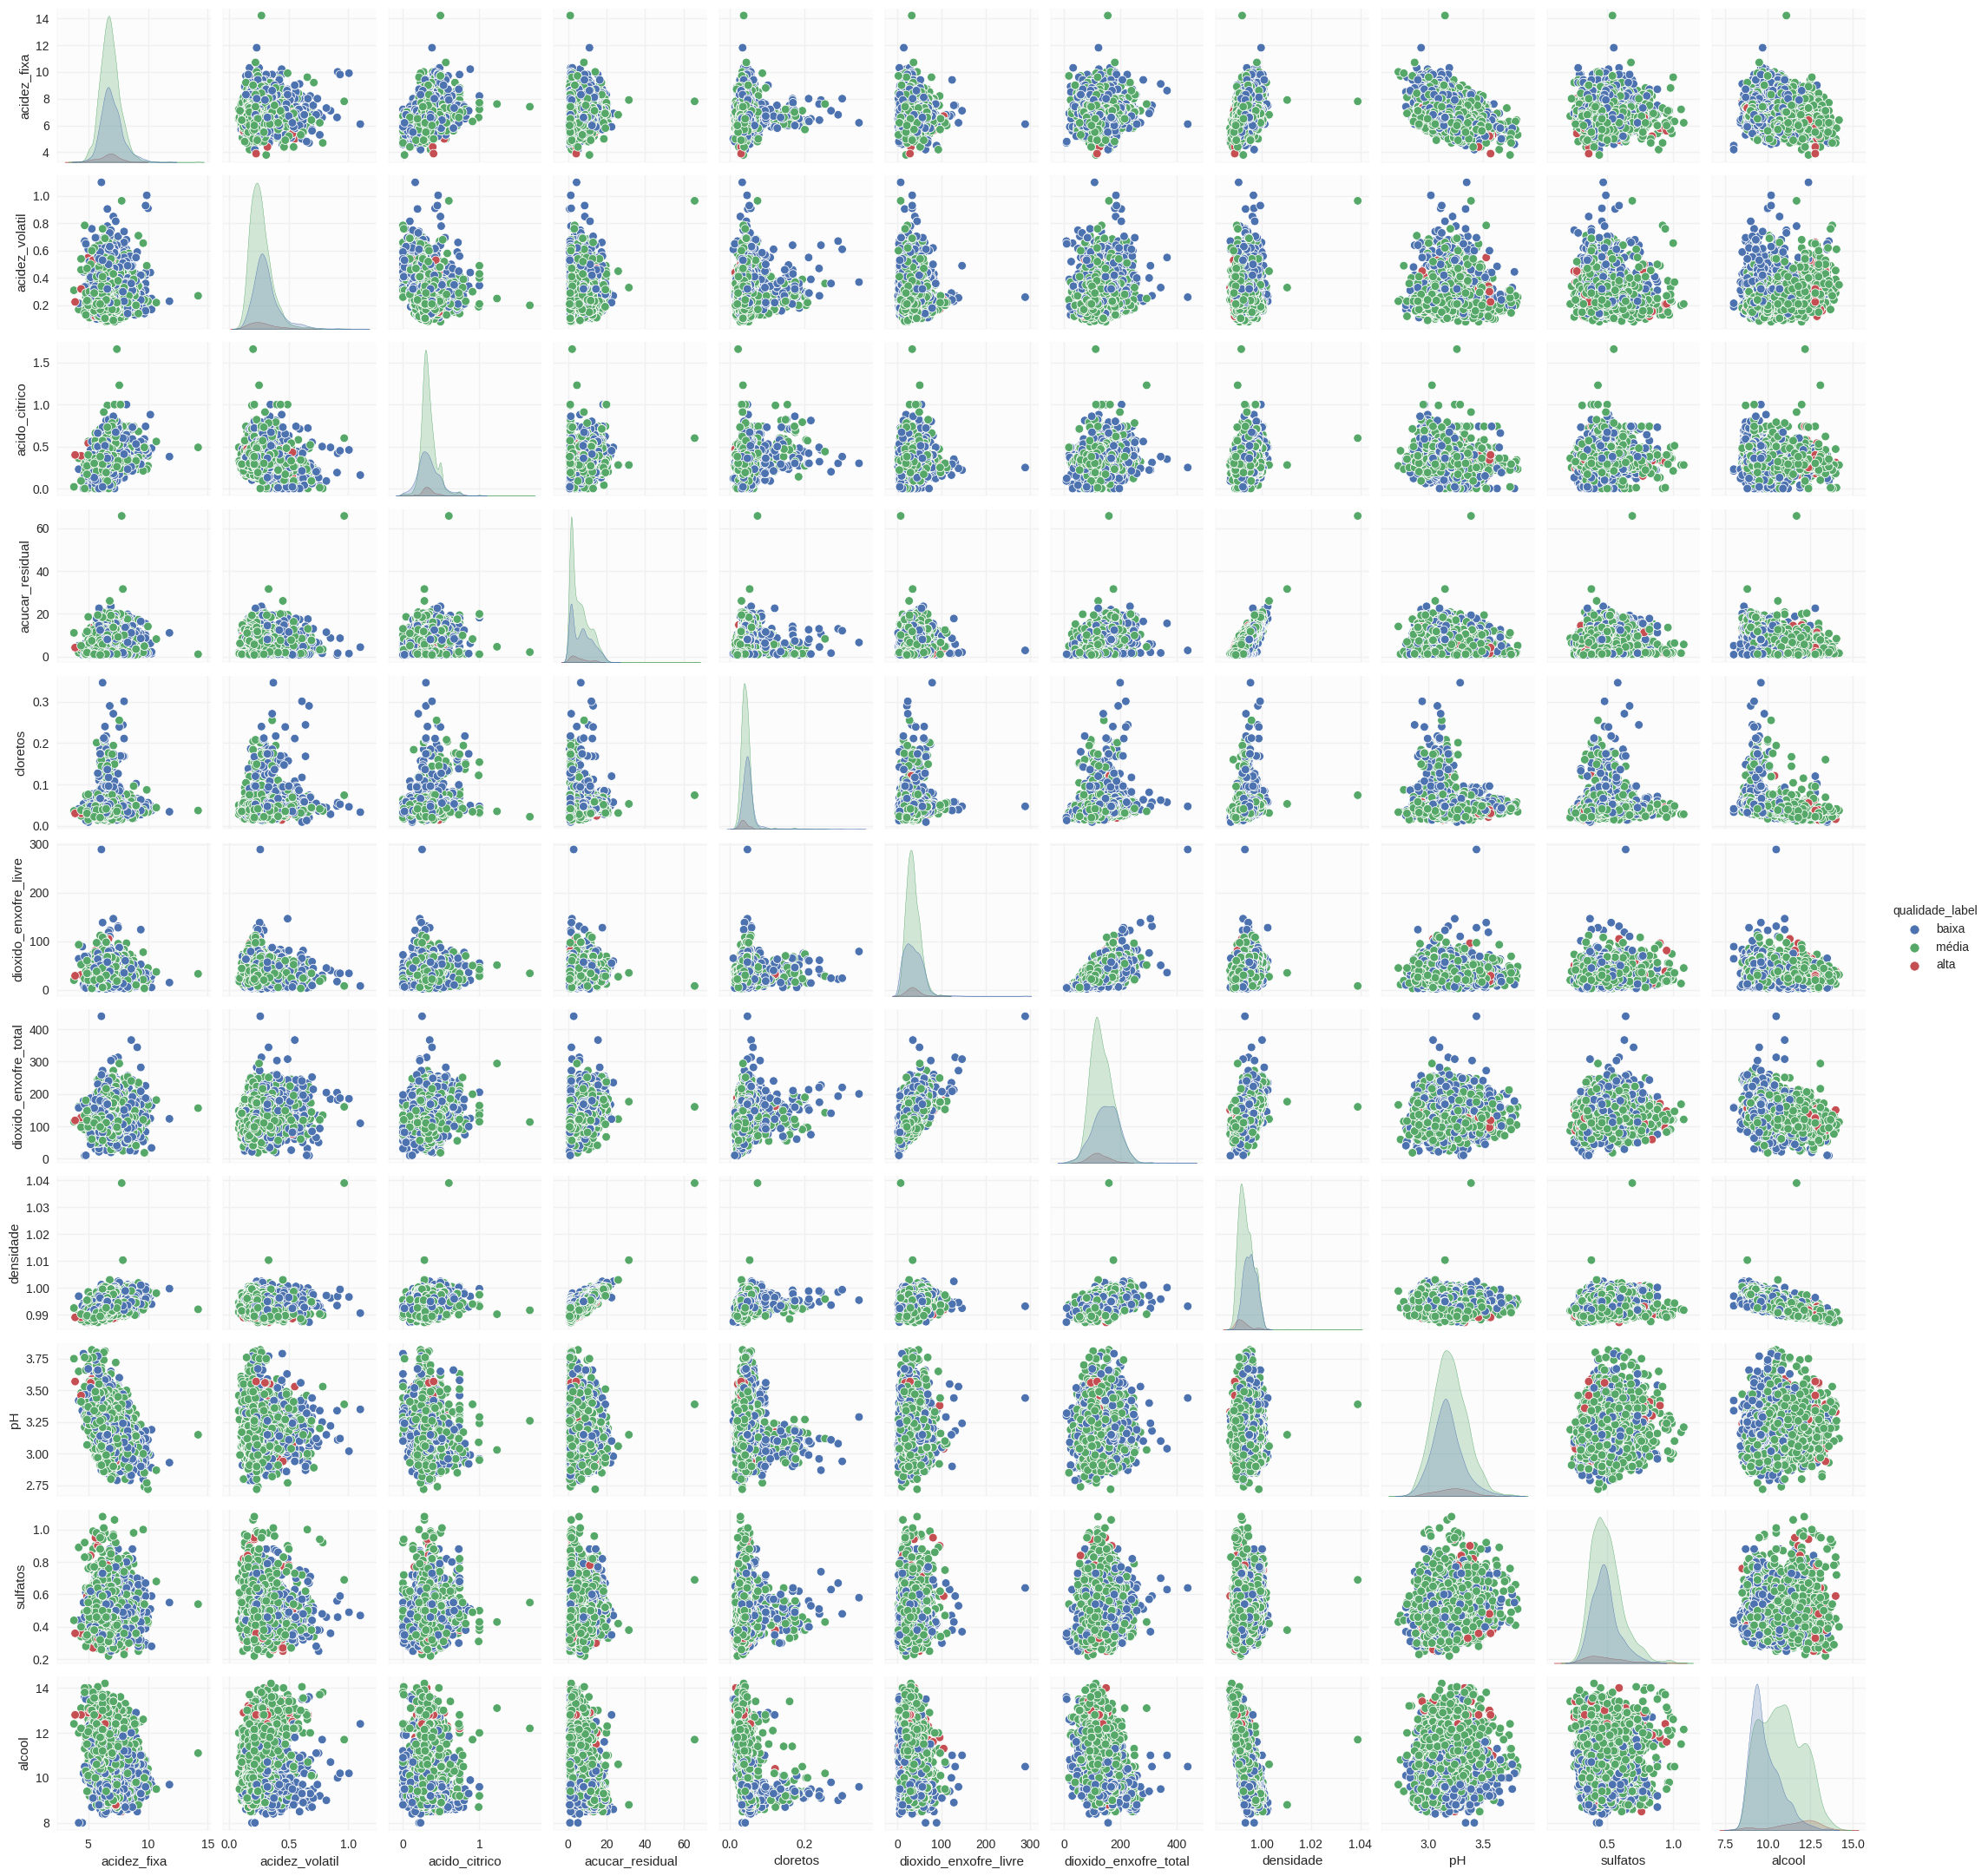

In [67]:
# Scatter Plot com Seaborn
sns.pairplot(df_wine_brancos_categ,
             hue = "qualidade_label",
             height = 2)

A visualização Scatter Plot acima, além de validar os achados descritos no subitem 3.3.1. indica a necessidade de efetuar a normalização das variáveis preditoras, visando torná-las comparáveis. Além disso, será necessário aplicar alguma técnica para tratamento dos outliers, que em determinadas séries se mostram mais evidentes.

## 4. Pré-Processamento de dados, Modelagem e Treinamento do Dataset original




### 4.1. Separação do conjunto de treino e teste - dataset original

Primeiramente iremos transformar a variável target em uma variável quantitativa, uma vez que a maioria dos algorítmos de machine learning só trabalham com dados numéricos.

In [68]:
# Transformando a variável target, do tipo categórica em int, com aplicação do Ordinal Encoding
df_wine_brancos_categ['qualidade_label'] = df_wine_brancos_categ['qualidade_label'].replace({'baixa' : '0',
                                                                                             'média' : '1',
                                                                                             'alta' : '2'}).astype(int)
df_wine_brancos_categ.head()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


Será utilizado 80% do conjunto de dados para modelagem e 20% para teste, usando a estratégia train-test-split. Adicionalmente será aplicado a validação cruzada estratificada, buscando obter uma maior confiança nas estimativas de desempenho, uma vez que todos os dados serão utilizados tanto para treino, como para teste.

In [69]:
# Definição de parãmentos para separação do conjunto de treino e teste
test_size = 0.20 # tamanho do conjunto de teste
seed = 13 # semente aleatória

# Separação em conjuntos de treino e teste
array = df_wine_brancos_categ.values
X = array[:,0:11]
y = array[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

### 4.1.1 Treinamento do modelo - dataset original

A seguir serão criados e avaliados os modelos utilizados para treinamento do dataset original, utilizando pipeline para otimizar os fluxos de trabalho de preparação do modelo, aplicadas especificamente no conjunto de treino, de forma a evitar ocorrência de data leakage.

LR-orig: 0.684 (0.018)
KNN-orig: 0.654 (0.024)
CART-orig: 0.746 (0.019)
NB-orig: 0.668 (0.026)
SVM-orig: 0.628 (0.004)
Bag-orig: 0.810 (0.014)
RF-orig: 0.813 (0.016)
ET-orig: 0.813 (0.017)
Ada-orig: 0.682 (0.016)
GB-orig: 0.755 (0.023)
Vot-orig: 0.711 (0.013)
LR-padr: 0.712 (0.017)
KNN-padr: 0.722 (0.023)
CART-padr: 0.743 (0.017)
NB-padr: 0.668 (0.022)
SVM-padr: 0.741 (0.021)
Bag-padr: 0.808 (0.018)
RF-padr: 0.814 (0.017)
ET-padr: 0.814 (0.017)
Ada-padr: 0.681 (0.016)
GB-padr: 0.754 (0.023)
Vot-padr: 0.746 (0.018)
LR-norm: 0.711 (0.014)
KNN-norm: 0.725 (0.016)
CART-norm: 0.747 (0.025)
NB-norm: 0.668 (0.022)
SVM-norm: 0.733 (0.018)
Bag-norm: 0.808 (0.014)
RF-norm: 0.815 (0.018)
ET-norm: 0.816 (0.018)
Ada-norm: 0.682 (0.016)
GB-norm: 0.754 (0.023)
Vot-norm: 0.736 (0.016)


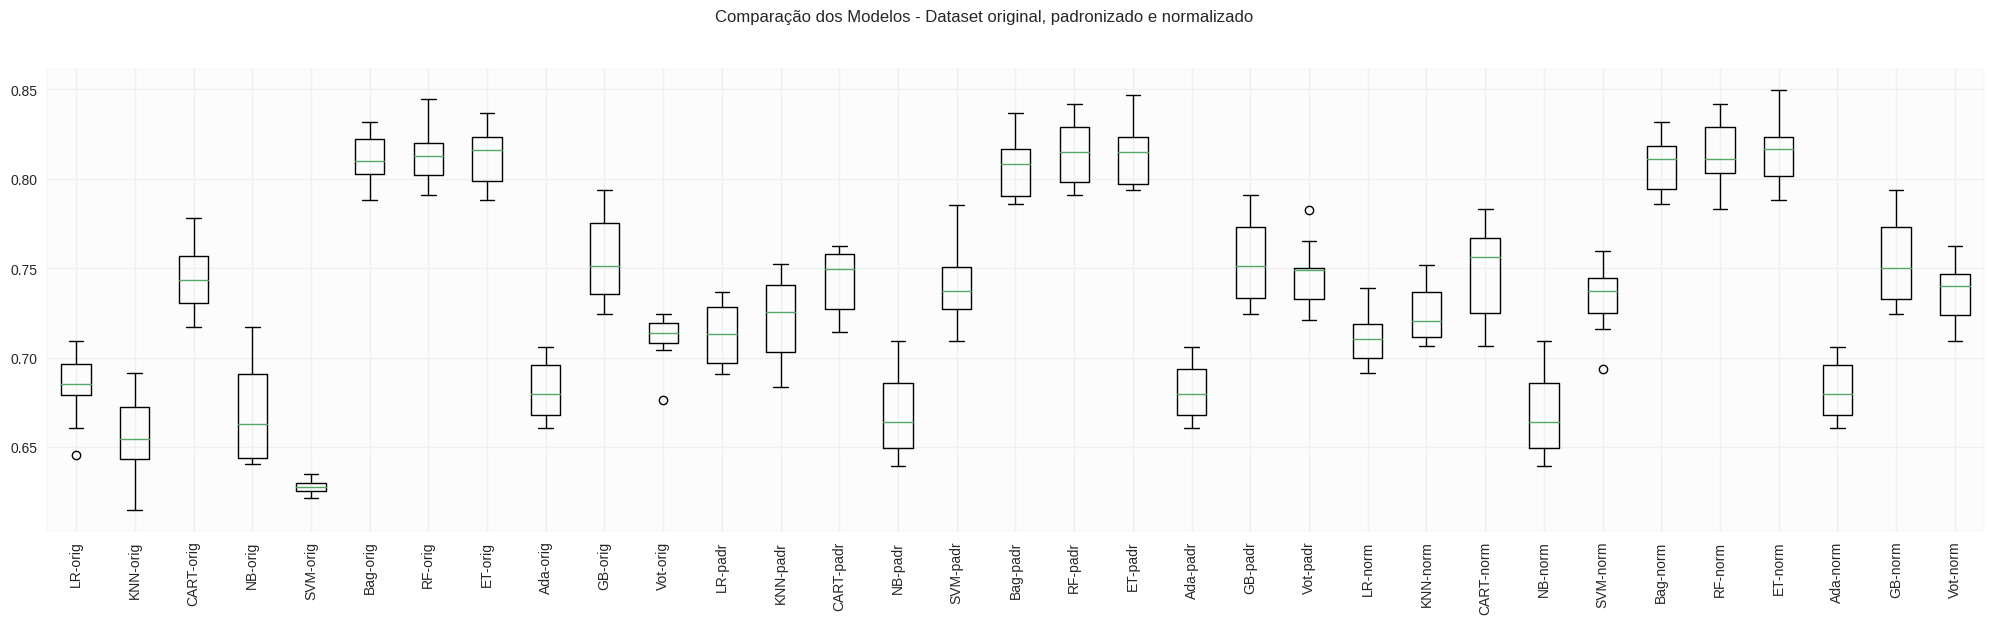

In [92]:
np.random.seed(13) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

As acurácias mais altas, em torno de 81% e desvio padrão de 0.02, foram obtidas com os classificadores Random Forest e Extra Tree, com resultado pouco superior com os dados normalizados.

### 4.1.1.1 Métricas de avaliação

Para melhor avaliar o desempenho do modelo, iremos plotar a matriz de confusão para avaliar o número de classificações corretas em relação ao número de classificações indicadas pelo modelo. Para matriz de confusão serão selecionados os classificadores Random Forest e o SVM com dados padronizados, para fins de comparação.

Classificador Randon Forest - dados normalizados


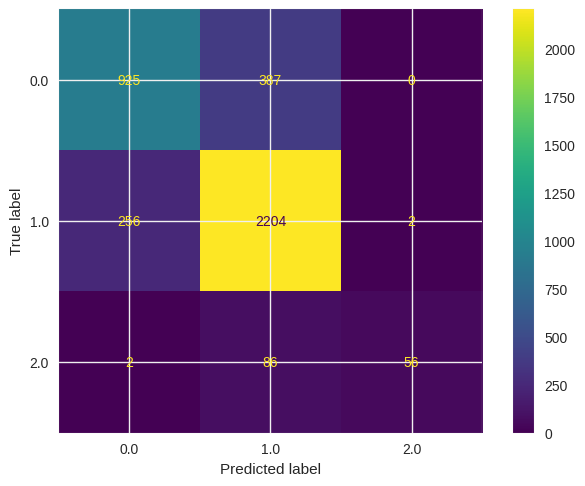

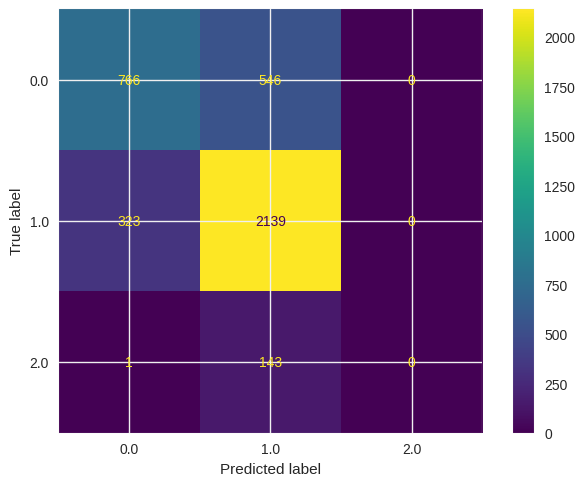

In [94]:
# Selecionando os classificadores para avaliação na matriz de confusão
RF_norm = Pipeline([min_max_scaler, random_forest])
SVM_padr = Pipeline([standard_scaler, svm])

# Obtendo as predições dos modelos selecionados para gerar a matriz de confusão
y_train_RFnorm_pred = cross_val_predict(RF_norm, X_train, y_train, cv = kfold)
y_train_SVMpadr_pred = cross_val_predict(SVM_padr, X_train, y_train, cv = kfold)

# Plotando a matriz de confusão
title = "Classificador Randon Forest - dados normalizados"
ConfusionMatrixDisplay.from_predictions(y_train, y_train_RFnorm_pred)
print(title)
plt.show()

ConfusionMatrixDisplay.from_predictions(y_train, y_train_SVMpadr_pred)
title = "Classificador SVM - dados padronizados"
plt.show()

Dado o desbalanceamento do dataset, já era esperado um baixo nível de acertos na classe 2 (qualidade alta), no entanto, o Random Forest ainda obteve algum percentual de acerto (40%) para esta classe, assim como obteve percentuais de acerto maiores também nas classes 0 e 1.

Seguindo com a avaliação de desempenho para o classificador Random Forest, iremos calcular as respectivas métricas de precisão, recall, sensibilidade e especificidade.

In [96]:
# Definindo as predições
y_true = y_train
y_pred_RF = y_train_RFnorm_pred

# Calculando as métricas
accuracy = accuracy_score(y_true, y_pred_RF)
precision = precision_score(y_true, y_pred_RF, average='macro')
recall = recall_score(y_true, y_pred_RF, average='macro')

# Plotando os resultados em uma tabela
data = {"Métrica": ["Acurácia", "Precisão (VP/VP+FP)", "Recall (VP/VP+FN)"],
        "Resultados": [accuracy, precision, recall]}

df_results = pd.DataFrame(data)

print(df_results)

               Métrica  Resultados
0             Acurácia    0.812915
1  Precisão (VP/VP+FP)    0.856912
2    Recall (VP/VP+FN)    0.663042


Os resultados que 85% das amostras foram classificadas corretamente.

## 4.2 Feature Selection

A aplicação do feature selection visa reduzir o ruído durante o treinamento, selecionando os atributos que mais contribuem para a saída da classe y. Serão aplicadas 3 técnicas e a partir do resultado de cada técnica serão escolhidos os atributos como maior relevância para o modelo.

In [97]:
# Preparação dos dados para aplicação do feature selection

# Separação dos atributos - holdout
array = df_wine_brancos_categ.values
X = array[:,0:11] # atributos
y = array[:,11] # classe (target)

In [98]:
# Seleção univariada usando a classe SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", df_wine_brancos_categ.columns[0:11])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df_wine_brancos_categ.columns[0:11]))


Número original de atributos: 11

Número reduzido de atributos: 4

Atributos Originais: Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'pH', 'sulfatos', 'alcool'],
      dtype='object')

Scores dos Atributos Originais: [2.192e+01 1.337e+02 2.325e-01 2.193e+01 9.087e+01 5.910e-01 7.666e+01
 2.097e+02 1.969e+01 7.116e+00 4.782e+02]

Atributos Selecionados: ['acidez_volatil' 'cloretos' 'densidade' 'alcool']


In [100]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", df_wine_brancos_categ.columns[0:11])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=df_wine_brancos_categ.columns[0:11]))

Atributos Originais: Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'pH', 'sulfatos', 'alcool'],
      dtype='object')

Atributos Selecionados: [False  True False False False False False  True  True False  True]

Ranking de atributos: [4 1 5 6 3 7 8 1 1 2 1]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['acidez_volatil' 'densidade' 'pH' 'alcool']


In [101]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", df_wine_brancos_categ.columns[0:11])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'pH', 'sulfatos', 'alcool'],
      dtype='object')
[0.074 0.11  0.084 0.081 0.082 0.093 0.085 0.093 0.079 0.075 0.143]


Baseado nas três técnicas de feature selection aplicadas acima, iremos reduzir o número de variáveis do modelo, selecionando os atributos com maior contribuição para a saída esperada. A escolha baseou-se nos atributos coincidentes nas três técnicas aplicadas.

In [102]:
# Preparando novo dataset com variáveis reduzidas para aplicação dos modelos
atributos = ['acidez_volatil', 'densidade', 'alcool', 'qualidade_label']
wine_reduzido = df_wine_brancos_categ[atributos]
print(wine_reduzido)

      acidez_volatil  densidade  alcool  qualidade_label
0               0.27    1.00100     8.8                1
1               0.30    0.99400     9.5                1
2               0.28    0.99510    10.1                1
3               0.23    0.99560     9.9                1
4               0.23    0.99560     9.9                1
...              ...        ...     ...              ...
4893            0.21    0.99114    11.2                1
4894            0.32    0.99490     9.6                0
4895            0.24    0.99254     9.4                1
4896            0.29    0.98869    12.8                1
4897            0.21    0.98941    11.8                1

[4898 rows x 4 columns]


## 4.3 Modelagem e Treinamento Dataset simplificado

### 4.3.1. Separação em conjunto de treino e conjunto de teste dataset simplificado

Será utilizado 80% do conjunto de dados para modelagem e 20% para teste, usando a estratégia train-test-split. Adicionalmente será aplicado a validação cruzada estratificada, buscando obter uma maior confiança nas estimativas de desempenho, uma vez que todos os dados serão utilizados tanto para treino, como para teste.

In [105]:
# Definição de parãmentos para separação do conjunto de treino e teste
test_size = 0.20 # tamanho do conjunto de teste
seed = 13 # semente aleatória

# Separação em conjuntos de treino e teste
array = wine_reduzido.values
X_dssimple = array[:,0:3]
y_dssimple = array[:,3]
X_dssimple_train, X_dssimple_test, y_dssimple_train, y_dssimple_test = train_test_split(X_dssimple, y_dssimple,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação



### 4.3.2. Treinamento do modelo - dataset simplificado

LR-orig: 0.701 (0.016)
KNN-orig: 0.695 (0.013)
CART-orig: 0.728 (0.017)
NB-orig: 0.662 (0.021)
SVM-orig: 0.676 (0.015)
Bag-orig: 0.767 (0.012)
RF-orig: 0.767 (0.014)
ET-orig: 0.747 (0.016)
Ada-orig: 0.694 (0.028)
GB-orig: 0.729 (0.023)
Vot-orig: 0.703 (0.016)
LR-padr: 0.713 (0.022)
KNN-padr: 0.698 (0.016)
CART-padr: 0.724 (0.020)
NB-padr: 0.662 (0.021)
SVM-padr: 0.722 (0.022)
Bag-padr: 0.768 (0.018)
RF-padr: 0.766 (0.016)
ET-padr: 0.747 (0.015)
Ada-padr: 0.694 (0.028)
GB-padr: 0.729 (0.023)
Vot-padr: 0.730 (0.022)
LR-norm: 0.710 (0.020)
KNN-norm: 0.700 (0.019)
CART-norm: 0.724 (0.015)
NB-norm: 0.662 (0.021)
SVM-norm: 0.720 (0.022)
Bag-norm: 0.768 (0.015)
RF-norm: 0.762 (0.013)
ET-norm: 0.747 (0.022)
Ada-norm: 0.694 (0.028)
GB-norm: 0.729 (0.022)
Vot-norm: 0.729 (0.021)


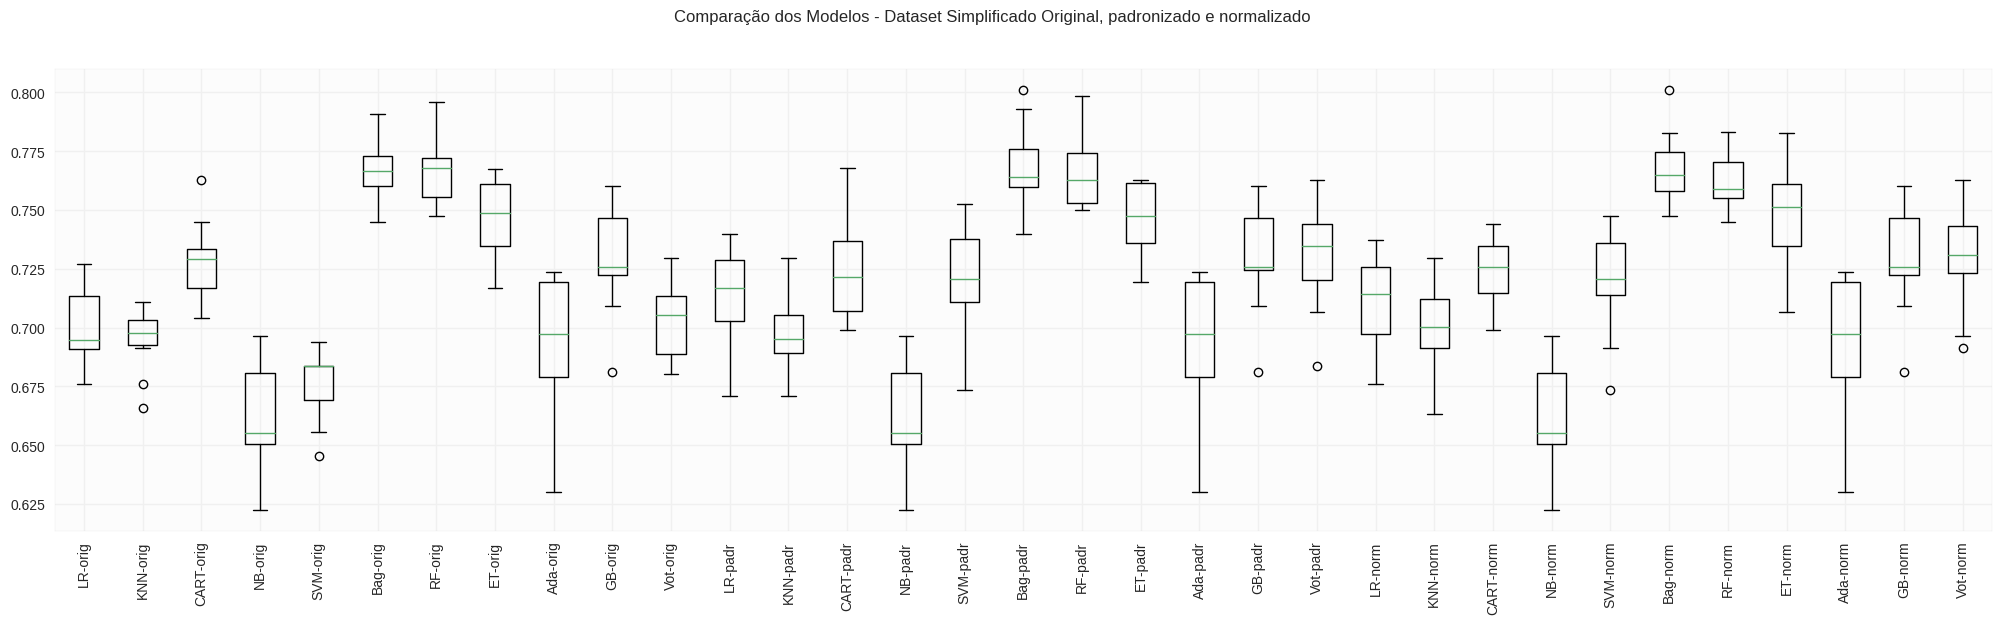

In [106]:
np.random.seed(13) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_dssimple_train, y_dssimple_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset Simplificado Original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## 5. Modelagem e Inferência

### 5.1 Criação e avaliação dos modelos utilizando Pipeline

Dados os resultados apresentados com o treinamento usando o dataset original e o simplificado, o modelo que apresentou melhor acurácia foi o que utilizou o algortimo Random Forest, com dados normalizados.
Desta forma a etapa seguinte, em favor do tempo de execução, seguirá com otimização dos hiperparâmentos apenas desse algoritmo.

### 5.2 Otimização dos Hiperparâmetros

In [107]:
# Tuning do Random Forest

np.random.seed(13) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
random_forest = ('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('RF-orig', Pipeline(steps=[random_forest])))
pipelines.append(('RF-padr', Pipeline(steps=[standard_scaler, random_forest])))
pipelines.append(('RF-norm', Pipeline(steps=[min_max_scaler, random_forest])))

param_grid = {
    'RF__n_estimators': [100,300,500],
    'RF__max_features': [3,5,7,11],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: RF-orig - Melhor: 0.817768 usando {'RF__max_features': 3, 'RF__n_estimators': 500}
Sem tratamento de missings: RF-padr - Melhor: 0.815981 usando {'RF__max_features': 3, 'RF__n_estimators': 500}
Sem tratamento de missings: RF-norm - Melhor: 0.818027 usando {'RF__max_features': 5, 'RF__n_estimators': 300}


Conforme resultado obtido com o GridSearch, o melhor score foi obtido utilizando 5 features, com 300 árvores e dados normalizados.

## 6. Finalização do Modelo

In [108]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = RandomForestClassifier(n_estimators=300, max_features=5)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8193877551020409


Denota-se uma boa capacidade de generalização do modelo, dado a acurácia obtida com o conjunto de teste, muito próxima do resultado obtido com o conjunto de treino.

In [109]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

RandomForestClassifier(max_features=5, n_estimators=300)

## Conclusões

A partir dos resultados obtidos em treinamento com diversos algoritmos aplicados tanto no dataset completo, quanto no dataset com features reduzidas, infere-se que os resultados obtidos são satisfatórios, sendo o modelo capaz de predizer com 85% de precisão, em média, qual a nota de qualidade atribuída (nota sensorial) a determinada amostra de vinho branco, baseado nas características físico-químicas obtidas em análises laboratoriais.
Para melhores resultados, sugere-se ampliar o conjunto de dados com vinhos de qualidade superior, para assim melhor predizer o conjunto de features que direcionam para uma melhor avaliação da qualidade.